In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split


from scipy.stats import ttest_ind

#Improvements for the code, hot encoding, balancing the data by under or oversampling, and using neural networks, and standardize the range of values 

In [3]:
bankrate_dataset = pd.read_csv('bankrate_candidate.csv')
cleaned_bankrate_dataset = bankrate_dataset.drop(columns=['applications']).dropna()
cleaned_bankrate_dataset

,User ID,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,bounty
0,00007820-89cb-4c1d-9940-eb270d605a35,cover_an_unexpected_cost,100000,669,fair,full_time,consumer_discretionary,5024,927,0,B,0,0
1,00012b55-514c-421e-9c76-3300abbc1134,credit_card_refinancing,70000,594,fair,full_time,information_technology,5764,1177,0,B,0,0
2,000157c1-b6a3-4c86-82c7-9ec1bda3799a,home_improvement,10000,596,fair,full_time,information_technology,4017,1487,0,A,0,0
3,00020400-efab-4b10-8812-2a0aaf774841,home_improvement,100000,642,fair,part_time,energy,3129,904,0,A,0,0
4,0002f737-0cda-48fb-91ed-533f3d0eab05,major_purchase,30000,642,fair,full_time,energy,4220,1620,0,A,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,fffb48e8-fc77-49fe-ab4e-e99a0829a788,other,40000,724,good,full_time,consumer_staples,5800,1460,0,A,0,0
99996,fffb63e2-b1d6-4d73-b766-44ba50203c00,major_purchase,70000,621,fair,full_time,consumer_staples,5691,2705,0,B,0,0
99997,fffba42b-265f-4269-a6d5-c8db7e3bd430,major_purchase,80000,345,poor,full_time,real_estate,3312,1210,0,C,0,0
99998,fffd8e45-d5f8-4b06-b1a4-2d4bf527ee51,debt_conslidation,90000,448,poor,full_time,industrials,4597,1420,0,C,0,0


In [5]:
def numerialize (data, column):
    unique_values = data[column].unique()
    mapping = {value: idx for idx, value in enumerate(unique_values)}
    data[column] = data[column].map(mapping)
    return data

In [6]:
numerical_dataset = cleaned_bankrate_dataset.drop(columns=["User ID"])
numerical_dataset = numerialize(numerical_dataset, "Reason")
numerical_dataset = numerialize(numerical_dataset, "Fico_Score_group")
numerical_dataset = numerialize(numerical_dataset, "Employment_Status")
numerical_dataset = numerialize(numerical_dataset, "Employment_Sector")
numerical_dataset = numerialize(numerical_dataset, "Lender")
numerical_dataset

train_numerical_dataset = numerical_dataset.drop(columns=["bounty"]).sample(frac=0.8, random_state=0)
test_numerical_dataset = numerical_dataset.drop(columns=['bounty']).drop(train_numerical_dataset.index)

In [7]:
y_train = train_numerical_dataset["Approved"]
X_train = train_numerical_dataset.drop(columns=["Approved"])

y_test = test_numerical_dataset["Approved"]
X_test = test_numerical_dataset.drop(columns=["Approved"])

treeClassifier = DecisionTreeClassifier()
treeClassifier = treeClassifier.fit(X_train, y_train)


treeClassifier.score(X_train, y_train)
# treeClassifier.score(X_test, y_test)


1.0

Feature Importances (sorted): [('Monthly_Gross_Income', 0.24425576251611972), ('Monthly_Housing_Payment', 0.23240660425914514), ('FICO_score', 0.2180824774573343), ('Loan_Amount', 0.09483023074081719), ('Employment_Sector', 0.07872619144748959), ('Reason', 0.06464207714557207), ('Lender', 0.034591803685647175), ('Fico_Score_group', 0.02523757247615548), ('Employment_Status', 0.005184830042545367), ('Ever_Bankrupt_or_Foreclose', 0.0020424502291740633)]


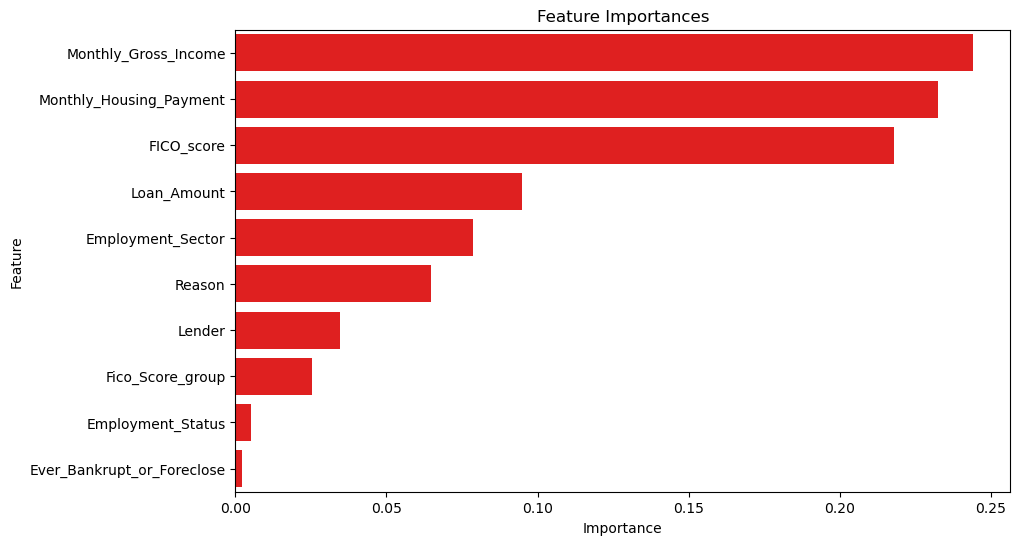

In [6]:
importances = treeClassifier.feature_importances_
feature_importance = sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)
print("Feature Importances (sorted):", feature_importance)

importance_df = pd.DataFrame(feature_importance, columns=["Feature", "Importance"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, color= "red")
plt.title("Feature Importances")
plt.show()

Feature Importances (sorted): [('FICO_score', 0.20783133566504144), ('Monthly_Housing_Payment', 0.18359757080636038), ('Relative_Income', 0.16840468974879885), ('Monthly_Gross_Income', 0.16068003592944086), ('Employment_Sector', 0.07204407964348437), ('Loan_Amount', 0.053530179830431165), ('Reason', 0.053200557762720785), ('Ability_to_pay', 0.03735337218245146), ('Lender', 0.03300225846446875), ('Fico_Score_group', 0.023577965476225746), ('Employment_Status', 0.004361626072837952), ('Ever_Bankrupt_or_Foreclose', 0.002416328417738383)]


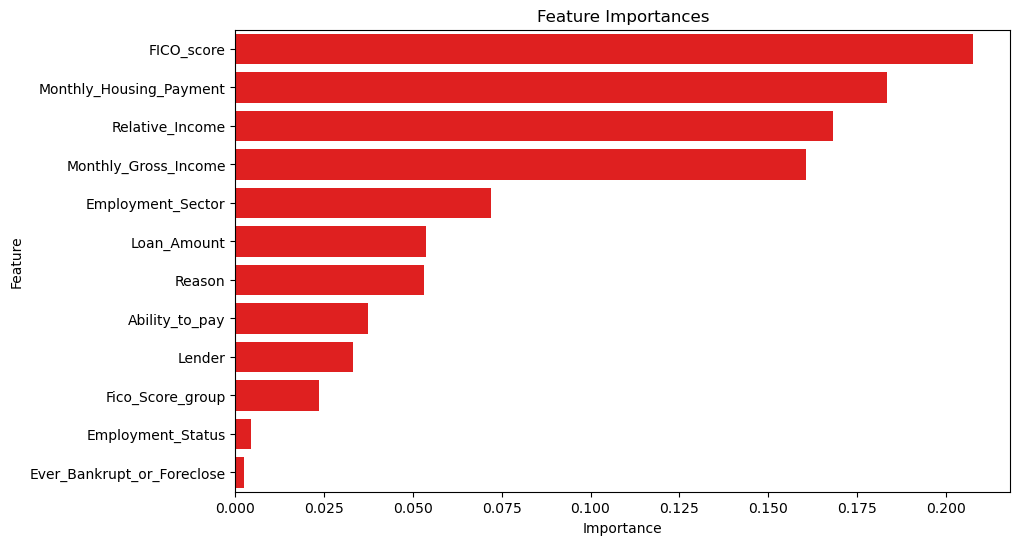

0.8275548907527112

In [ ]:
experimental_numerical_dataset = numerical_dataset.copy()
experimental_numerical_dataset["Ability_to_pay"] = experimental_numerical_dataset["Fico_Score_group"] / experimental_numerical_dataset["Loan_Amount"]
experimental_numerical_dataset["Relative_Income"] = experimental_numerical_dataset["Monthly_Gross_Income"] - experimental_numerical_dataset["Monthly_Housing_Payment"]


train_experimental_numerical_dataset = experimental_numerical_dataset.drop(columns=["bounty"]).sample(frac=0.8, random_state=0)
test_experimental_numerical_dataset = experimental_numerical_dataset.drop(columns=['bounty']).drop(train_numerical_dataset.index)

y_experimental_train = train_experimental_numerical_dataset["Approved"]
X_experimental_train = train_experimental_numerical_dataset.drop(columns=["Approved"])

y_experimental_test = test_experimental_numerical_dataset["Approved"]
X_experimental_test = test_experimental_numerical_dataset.drop(columns=["Approved"])

treeClassifier = DecisionTreeClassifier()
treeClassifier = treeClassifier.fit(X_experimental_train, y_experimental_train)


treeClassifier.score(X_experimental_train, y_experimental_train)
treeClassifier.score(X_experimental_test, y_experimental_test)

importances = treeClassifier.feature_importances_
feature_importance = sorted(zip(X_experimental_train.columns, importances), key=lambda x: x[1], reverse=True)
print("Feature Importances (sorted):", feature_importance)

importance_df = pd.DataFrame(feature_importance, columns=["Feature", "Importance"])
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df, color= "red")
plt.title("Feature Importances")
plt.show()
treeClassifier.score(X_experimental_test, y_experimental_test)  


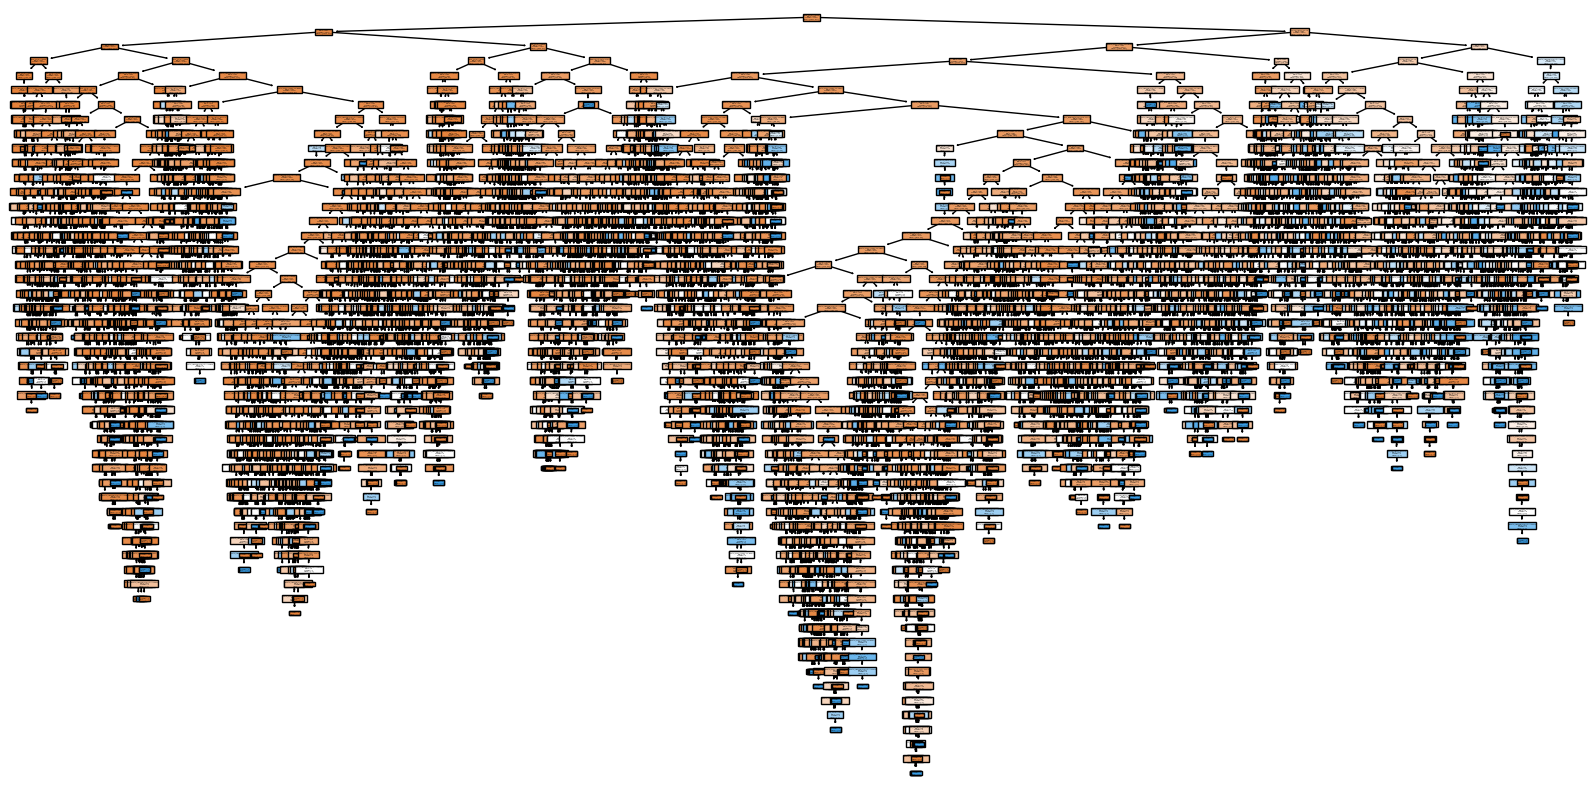

In [12]:
plt.figure(figsize=(20, 10)) 
tree = plot_tree(treeClassifier, feature_names=X_train.columns, filled=True)

In [7]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8940114322346279

In [8]:
lr = LogisticRegression(solver='lbfgs',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8893103264063251

In [9]:
k_range = list(range(1, 25))
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=10, max_depth=k)
    scores = cross_val_score(rf, X_test, y_test, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)



[0.8888295314905417, 0.8888295314905417, 0.8887761126871228, 0.8894706142334415, 0.8895240615877975, 0.8897378224542841, 0.8896842608961796, 0.8902718962847237, 0.8905389331999434, 0.8908061985226603, 0.8890433494589027, 0.8882953149054164, 0.8861050868633711, 0.888081411284244, 0.8855705562179373, 0.8846090748582732, 0.8857312408922511, 0.8843953996445979, 0.8851435484018328, 0.8846627791710635, 0.8853038904649007, 0.8847157697104249, 0.8850897584362307, 0.886104858455874]


In [10]:
k_range = list(range(25, 75))
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=k, max_depth=9)
    scores = cross_val_score(rf, X_test, y_test, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)


[0.8915006429671047, 0.8905925518599224, 0.890325400740954, 0.8910197309816498, 0.8914472241636859, 0.8902185631341164, 0.8913938339112043, 0.8908595887751419, 0.8910732925397543, 0.8908595602242046, 0.8912334918481364, 0.8913404722096597, 0.8908596458770164, 0.8909664263819795, 0.890806169971723, 0.8921415258534445, 0.8906993323648855, 0.891287053406241, 0.8909129790276236, 0.8906457993577181, 0.8903254863937654, 0.8906459135614666, 0.8916075091248796, 0.8921416686081305, 0.8915006429671047, 0.8908061128698488, 0.8911801015956546, 0.8911801015956546, 0.8914471956127488, 0.891821241440429, 0.8909663692801052, 0.8916608993773613, 0.8914472812655603, 0.8909130075785608, 0.8911800159428432, 0.8906459135614668, 0.8914470814090002, 0.8913937197074558, 0.8910198166344611, 0.890539018852755, 0.8909663978310423, 0.8912336060518852, 0.8918746602438479, 0.8904857142530848, 0.892088107050026, 0.8913402152512253, 0.8912335775009479, 0.89139377680933, 0.891340329454974, 0.89139377680933]


In [26]:
approved_transactions=numerical_dataset[cleaned_bankrate_dataset['Approved']==1].drop(columns=['bounty'])
denied_transactions=numerical_dataset.drop(approved_transactions.index).drop(columns=['bounty'])
approved_transactions

,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved
6,4,80000,691,2,0,4,5103,1289,0,1,1
41,1,90000,779,3,0,8,10710,1840,0,1,1
42,1,100000,785,3,0,3,14290,1868,0,1,1
45,4,30000,708,2,0,9,7783,1525,0,1,1
81,2,100000,562,1,0,4,4853,1584,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
99958,0,50000,694,2,0,4,5817,2243,0,1,1
99968,0,80000,831,4,0,4,10028,2334,0,1,1
99978,1,20000,742,3,0,1,11735,1616,0,0,1
99979,4,20000,698,2,0,10,6220,1265,0,1,1


In [ ]:
def split_data_for_lender(data, lender, test_size=0.2, random_state=0):
    lender_data = data[data["Lender"] == lender]
    train_data, test_data = train_test_split(lender_data, test_size=test_size, random_state=random_state)
    return train_data, test_data

def train_rf_model(train_data, n_estimators=25, max_depth=9):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
    rf_model.fit(train_data.drop(columns=["Approved"]), train_data["Approved"])
    return rf_model

def evaluate_model(rf_model, test_data):
    return rf_model.score(test_data.drop(columns=["Approved"]), test_data["Approved"])

train_data_A, test_data_A = split_data_for_lender(numerical_dataset.drop(columns=['bounty']), 0)
rf_model_A = train_rf_model(train_data_A)
accuracy_A = evaluate_model(rf_model_A, test_data_A)
train_data_B, test_data_B = split_data_for_lender(numerical_dataset.drop(columns=['bounty']), 1)
rf_model_B = train_rf_model(train_data_B)
accuracy_B = evaluate_model(rf_model_B, test_data_B)
train_data_C, test_data_C = split_data_for_lender(numerical_dataset.drop(columns=['bounty']), 2)
rf_model_C = train_rf_model(train_data_C)
accuracy_C = evaluate_model(rf_model_C, test_data_C)
print(f"Accuracy for Lender A: {accuracy_A}, Lender B: {accuracy_B}, and Lender C: {accuracy_C}")


Accuracy for Lender A: 0.9192156862745098, Lender B: 0.8989646884821594, and Lender C: 0.8132809710817566


In [21]:
def predict_lender(data, rf_model_A, rf_model_B, rf_model_C):
    prob_A = rf_model_A.predict_proba(data.drop(columns=["Approved"]))[:, 1]  
    prob_B = rf_model_B.predict_proba(data.drop(columns=["Approved"]))[:, 1]  
    prob_C = rf_model_C.predict_proba(data.drop(columns=["Approved"]))[:, 1]  

    lender_predictions = np.argmax(np.array([prob_A, prob_B, prob_C]), axis=0)
    
    data['Predicted_Lender'] = lender_predictions
    return data

predicted_data = predict_lender(numerical_dataset.drop(columns=['bounty']), rf_model_A, rf_model_B, rf_model_C) 
predicted_data


,Reason,Loan_Amount,FICO_score,Fico_Score_group,Employment_Status,Employment_Sector,Monthly_Gross_Income,Monthly_Housing_Payment,Ever_Bankrupt_or_Foreclose,Lender,Approved,Predicted_Lender
0,0,100000,669,0,0,0,5024,927,0,0,0,2
1,1,70000,594,0,0,1,5764,1177,0,0,0,2
2,2,10000,596,0,0,1,4017,1487,0,1,0,2
3,2,100000,642,0,1,2,3129,904,0,1,0,2
4,3,30000,642,0,0,2,4220,1620,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,40000,724,2,0,3,5800,1460,0,1,0,2
99996,3,70000,621,0,0,3,5691,2705,0,0,0,2
99997,3,80000,345,1,0,7,3312,1210,0,2,0,2
99998,5,90000,448,1,0,9,4597,1420,0,2,0,2


Feature Importances (sorted): [('FICO_score', 0.20783133566504144), ('Monthly_Housing_Payment', 0.18359757080636038), ('Monthly_Gross_Income', 0.16068003592944086), ('Employment_Sector', 0.07204407964348437), ('Loan_Amount', 0.053530179830431165), ('Reason', 0.053200557762720785), ('Lender', 0.03300225846446875), ('Fico_Score_group', 0.023577965476225746), ('Employment_Status', 0.004361626072837952), ('Ever_Bankrupt_or_Foreclose', 0.002416328417738383)]


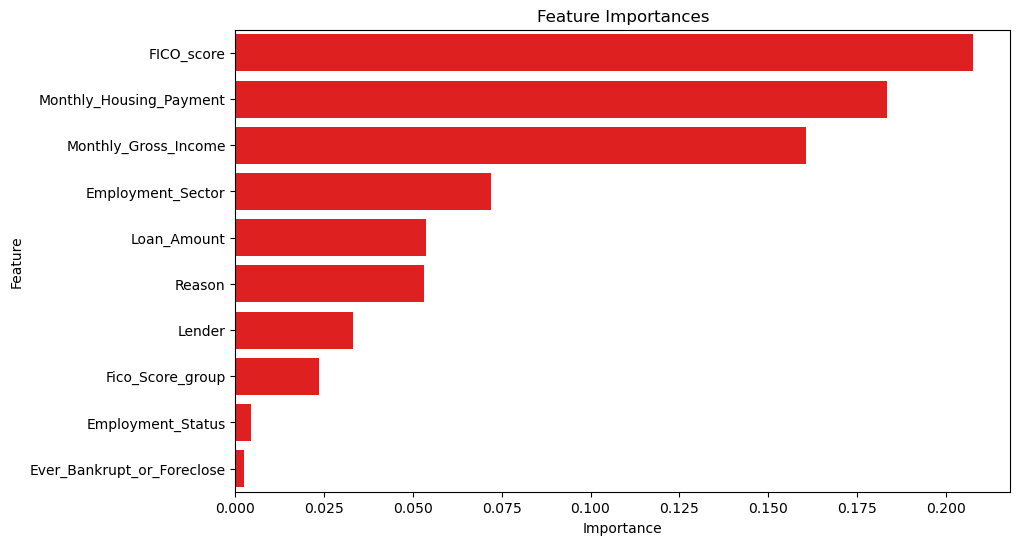

In [ ]:
def importance_graph(rf, train_data):
    feature_importance = sorted(zip(train_data.drop(columns=["Approved"]).columns, importances), key=lambda x: x[1], reverse=True)
    print("Feature Importances (sorted):", feature_importance)

    importance_df = pd.DataFrame(feature_importance, columns=["Feature", "Importance"])
    plt.figure(figsize=(10, 6))
    sns.barplot(x="Importance", y="Feature", data=importance_df, color= "red")
    plt.title("Feature Importances")
    return plt.show()

importance_graph(rf_model_A, train_data_A)





In [ ]:
denied_lender_A = denied_transactions[denied_transactions["Lender"]=="A"]
# approved_lender_B = approved_transactions[approved_transactions["Lender"]=="B"]
# denied_lender_B = denied_transactions[denied_transactions["Lender"]=="B"]
# approved_lender_C = approved_transactions[approved_transactions["Lender"]=="C"]
# denied_lender_C = denied_transactions[denied_transactions["Lender"]=="C"]

In [ ]:
def probability(data, lender):
    lender_data = data[data["Lender"] == lender]
    approval_counts = lender_data["Approved"].value_counts(normalize=True)
    return approval_counts.get(1, 0)

print("Approval rate for Lender A:", probability(numerical_dataset, 0))
print("Approval rate for Lender B:", probability(numerical_dataset, 1))
print("Approval rate for Lender C:", probability(numerical_dataset, 2))

Approval rate for Lender A: 0.07580392156862745
Approval rate for Lender B: 0.10985597811015178
Approval rate for Lender C: 0.1963010568409026


In [27]:
actual_profit = cleaned_bankrate_dataset['bounty'].sum()
actual_profit

2574400

In [32]:
def calculate_predicted_bounty(row):
    if row['Predicted_Approval'] == 1:  
        if row['Predicted_Lender'] == 0:
            return 250  
        elif row['Predicted_Lender'] == 1:
            return 350 
        elif row['Predicted_Lender'] == 2:
            return 150  
    else:
        return 0      

predicted_numerical_dataset = predicted_data.copy()

final_train = predicted_numerical_dataset.drop(columns=["Lender"]).sample(frac=0.8, random_state=0, )
final_test = predicted_numerical_dataset.drop(final_train.index)

final_X_train = final_train.drop(columns=["Approved"])
final_y_train = final_train["Approved"] 

final_y_test = final_test["Approved"]
final_X_test = final_test.drop(columns=["Approved"])

rf = RandomForestClassifier(n_estimators=25, max_depth=9,class_weight="balanced")
rf.fit(final_X_train, final_y_train)

predicted_approval = rf.predict(predicted_numerical_dataset.drop(columns=['Approved', 'Lender']))
predicted_numerical_dataset['Predicted_Approval'] = predicted_approval
predicted_numerical_dataset['Predicted_Bounty'] = predicted_numerical_dataset.apply(calculate_predicted_bounty, axis=1)
predicted_profit = predicted_numerical_dataset['Predicted_Bounty'].sum()
print(f"Predicted Profit: {predicted_profit}")



Predicted Profit: 5101950


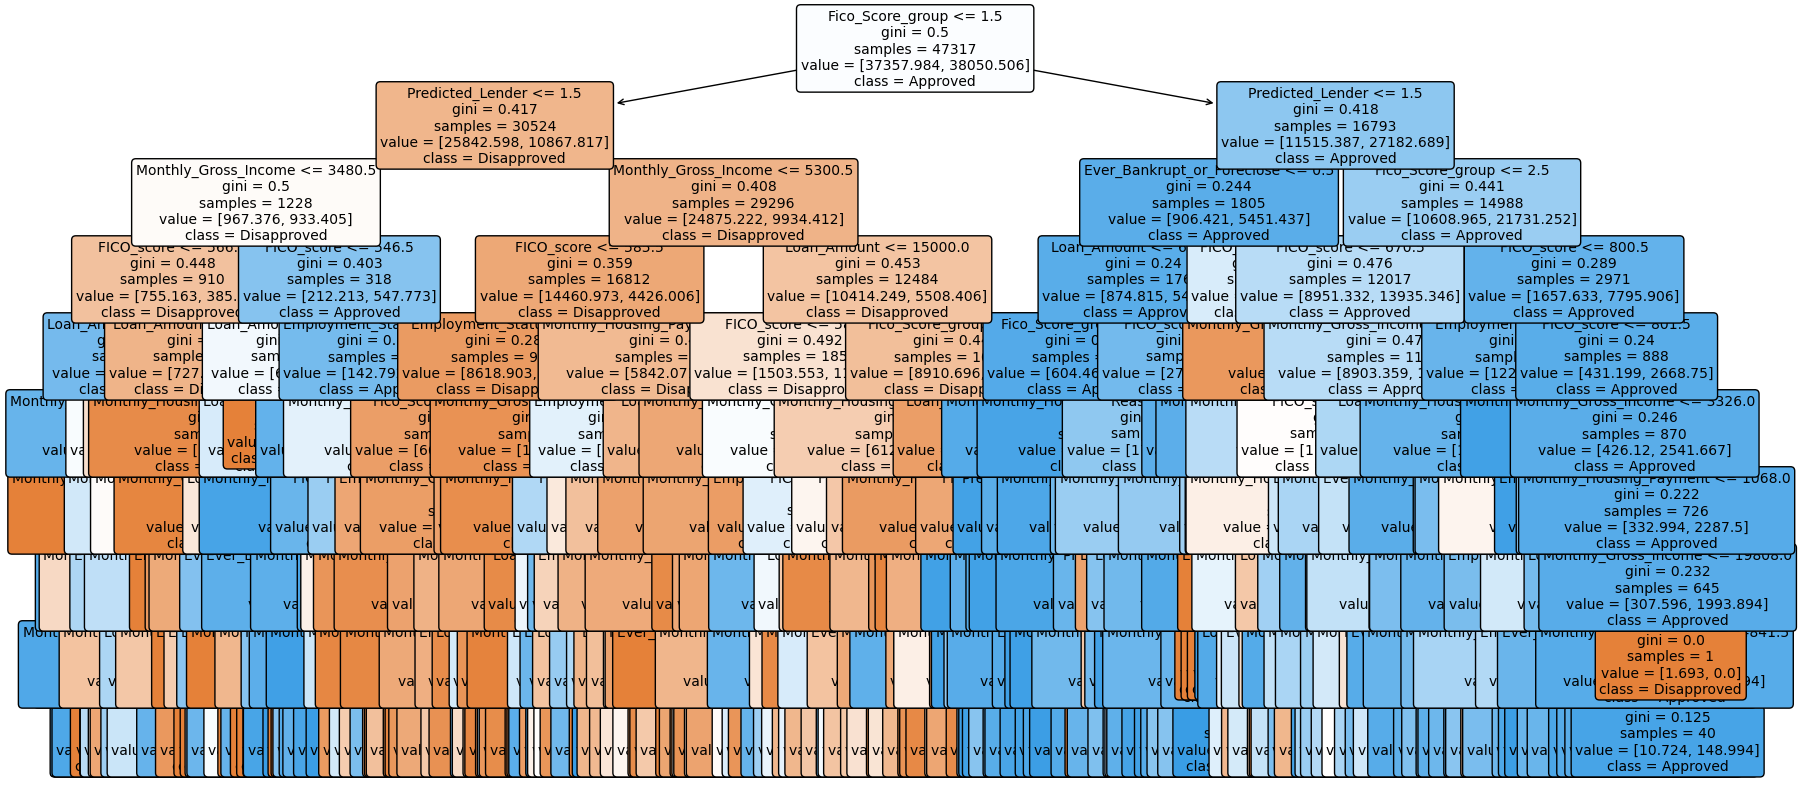

In [33]:
single_tree = rf.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(single_tree, 
          feature_names=final_X_train.columns,
          class_names=["Disapproved", "Approved"],
          filled=True, 
          rounded=True,
          fontsize=10)
plt.show()